# Data Preprocessing:

#### The main objective of preprocessing is:
1. checking data set for irrelavent columns which not serve our prediction of length of stay model and deal with it.
2. Selecting & dropping not Adult patients as they treatment may vary a lot from adult.
3. handling outliers.
4. Handling Categorical Variables:
   1) For ordinal categorical features
   2) For nominal categorical features
      - For higer cardinality features using Target mean encoding
      - For low cardinality features using pandas get dummies
5. Correlation heatmap: after encoding to check if there are two features highly correlated to each other & drop one of them.
6. Checking for duplication: after dropping highly correlated features and dropping dupli features
7. saving processed data set in csv file for next modeling step. 

About Dataset:
This dataset is about inpatient discharged from hospitals of state of New York provided by the Dept of Health of New York state for the year of 2015.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
import category_encoders as ce
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler,robust_scale
from sklearn.model_selection import train_test_split
import joblib

In [2]:
# loading the dataset.
data = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
# getting copy of the data set
# df = data.copy()

In [4]:
# Geitting Information about the Data
data.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331584 entries, 0 to 2331583
Data columns (total 31 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   health_service_area                  2331584 non-null  object 
 1   hospital_county                      2331584 non-null  object 
 2   operating_certificate_number         2331584 non-null  float64
 3   facility_id                          2331584 non-null  float64
 4   facility_name                        2331584 non-null  object 
 5   age_group                            2331584 non-null  object 
 6   zip_code__3_digits                   2331584 non-null  int64  
 7   gender                               2331584 non-null  object 
 8   race                                 2331584 non-null  object 
 9   ethnicity                            2331584 non-null  object 
 10  length_of_stay                       2331584 non-null  int64  
 11

In [5]:
#checking for duplication in data 
data.duplicated().sum()

0

In [6]:
# veiwing the head of the data the first 5 rows
pd.set_option('display.max_columns', None)  # This will display all columns
data.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,birth_weight,emergency_department_indicator,total_charges,total_costs,over_120_stay
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,5620.00,4561.28,0
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,0,Y,7404.18,6933.94,0
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,7931.28,7154.85,0
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,0,Y,11304.44,4584.11,0
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicaid,0,Y,8330.50,4361.74,0


* From the above and by puting the aim of our model in mind we can noticed that:

Not all the feature will serve our aim as we try to make general model could predict patient length of stay regard less of the city or state also as total cost also stay over 120 and chrges comes at the end of stay they don't make sence to keep them. then the following columns not usefull for the aim of this model it is better to be droped: ['health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits','patient_disposition','ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code','apr_severity_of_illness_code','payment_typology_1','birth_weight','total_charges','total_costs','over_120_stay']

In [7]:
# dropping unnecessary columns for the model from data frame
data.drop(['health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits','patient_disposition','ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code','apr_severity_of_illness_code','payment_typology_1','birth_weight','total_charges','total_costs','over_120_stay'],axis=1, inplace=True)

In [8]:
data.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,50 to 69,F,5,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,Minor,Minor,Medical,Y
1,18 to 29,F,8,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,Moderate,Minor,Medical,Y
2,30 to 49,M,8,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,Minor,Minor,Medical,Y
3,50 to 69,F,4,Emergency,Asthma,NO PROC,Asthma,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical,Y
4,50 to 69,M,3,Emergency,Epilepsy; convulsions,NO PROC,Seizure,Diseases and Disorders of the Nervous System,Moderate,Moderate,Medical,Y


### 2. Selecting & dropping not Adult patients as they treatment may vary alot from adult.

In [9]:
# Selecting & dropping not Adult patients as they treatment may vary alot from adult
data[data.age_group == '0 to 17']['age_group'].count()

342237

In [10]:
data.drop(data[data.age_group == '0 to 17'].index,axis=0,inplace=True)

In [11]:
#checking for duplication in data 
data.duplicated().sum()

1264916

In [12]:
# Drop duplicates and reset the index
data = data.drop_duplicates().reset_index(drop=True)

### 3. handling outliers.

In [13]:
data.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,50 to 69,F,5,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,Minor,Minor,Medical,Y
1,18 to 29,F,8,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,Moderate,Minor,Medical,Y
2,30 to 49,M,8,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,Minor,Minor,Medical,Y
3,50 to 69,F,4,Emergency,Asthma,NO PROC,Asthma,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical,Y
4,50 to 69,M,3,Emergency,Epilepsy; convulsions,NO PROC,Seizure,Diseases and Disorders of the Nervous System,Moderate,Moderate,Medical,Y


<AxesSubplot:xlabel='length_of_stay'>

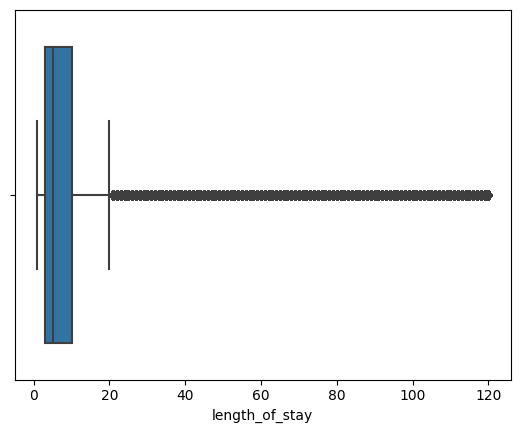

In [14]:
# visulize outliers using box plot
sns.boxplot(data=data,x='length_of_stay')

* From the above boxplot there outliers above 20 days we can drop the outliers or change there vale to the end of the wisker which is almost 20 days by this way we are going to keep those patient data and point that prediction of 20 days it means 20 and above days.

In [15]:
# Identify the outliers in the higher range of the values
outliers = data['length_of_stay'] > 20

In [16]:
# Replace the outliers with 20
data['length_of_stay'] = np.where(outliers, 20, data['length_of_stay'])

<AxesSubplot:xlabel='length_of_stay'>

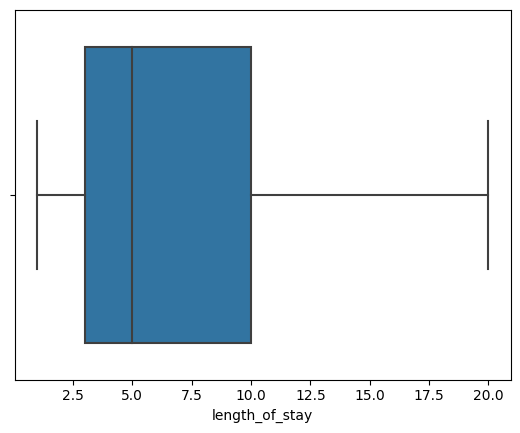

In [17]:
# visulize outliers using box plot
sns.boxplot(data=data,x='length_of_stay')

In [18]:
# taking copy of the data after 
df = data.copy()

In [19]:
# checking features value counts.
for i in list(df.columns):
    print(i)
    print(df[i].value_counts())
    print("*"*100)

age_group
50 to 69       259317
70 or Older    258530
30 to 49       140970
18 to 29        65614
Name: age_group, dtype: int64
****************************************************************************************************
gender
F    372420
M    352011
Name: gender, dtype: int64
****************************************************************************************************
length_of_stay
2     85287
3     83246
1     75987
4     71556
20    64834
5     59492
6     50393
7     43454
8     34841
9     27936
10    22994
11    19156
12    16278
13    14721
14    13616
15    10992
16     9155
17     7880
18     6796
19     5817
Name: length_of_stay, dtype: int64
****************************************************************************************************
type_of_admission
Emergency        535867
Elective         108556
Urgent            73572
Trauma             5225
Not Available      1050
Newborn             161
Name: type_of_admission, dtype: int64
*********************

In [20]:
# checking features n unique.
for i in list(df.columns):
    print(i)
    print(df[i].nunique())
    print("*"*100)

age_group
4
****************************************************************************************************
gender
2
****************************************************************************************************
length_of_stay
20
****************************************************************************************************
type_of_admission
6
****************************************************************************************************
ccs_diagnosis_description
257
****************************************************************************************************
ccs_procedure_description
232
****************************************************************************************************
apr_drg_description
285
****************************************************************************************************
apr_mdc_description
24
****************************************************************************************************
apr_severity_of_illness_de

### 4. Handling Categorical Variables:
  1) For ordinal categorical features

#### First encoding oridinal feature: 
By creating dictionary with ordinal number and maping the dictionary with the ordinal categorical feature

In [21]:
# age_group:
dict_age_group = {'18 to 29':1, '30 to 49':2, '50 to 69':3, '70 or Older':4}
# maping age goup dictionary
df['age_group'] = df['age_group'].map(dict_age_group)

In [22]:
df['age_group'].unique()

array([3, 1, 2, 4], dtype=int64)

In [23]:
# apr_severity_of_illness_description encode by made dictionery for it.
dict_apr_severity_of_illness_description = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df.apr_severity_of_illness_description = df.apr_severity_of_illness_description.map(dict_apr_severity_of_illness_description)
df.apr_severity_of_illness_description.unique()

array([1, 2, 3, 4], dtype=int64)

In [24]:
# apr_risk_of_mortality:
dict_apr_risk_of_mortality = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df["apr_risk_of_mortality"] = df["apr_risk_of_mortality"].map(dict_apr_risk_of_mortality)
df["apr_risk_of_mortality"].unique()

array([1, 2, 3, 4], dtype=int64)

### Second encoding nominal feature:
* For Features with high cardinality we are going to use Target Encoding (Mean Encoding) then dropping it:
  - (ccs_diagnosis_description: 257 unique values, ccs_procedure_description: 232, apr_drg_description: 285, apr_mdc_description: 24,  type_of_admission: 6 unique values)     


* For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique, apr_medical_surgical_description: 2, emergency_department_indicator: 2) 

#### * First high cardinality categorical Features

In [25]:
# Target Encoding (Mean Encoding) for (ccs_diagnosis_description: 257 unique values:
dict_ccs_diagnosis_description=round(df.groupby('ccs_diagnosis_description')['length_of_stay'].mean(),2).to_dict()
dict_ccs_diagnosis_description

{'Abdominal hernia': 6.35,
 'Abdominal pain': 4.28,
 'Acquired foot deformities': 3.87,
 'Acute and chronic tonsillitis': 2.75,
 'Acute and unspecified renal failure': 8.86,
 'Acute bronchitis': 4.15,
 'Acute cerebrovascular disease': 8.89,
 'Acute myocardial infarction': 7.51,
 'Acute posthemorrhagic anemia': 5.47,
 'Adjustment disorders': 6.15,
 'Administrative/social admission': 7.91,
 'Alcohol-related disorders': 7.62,
 'Allergic reactions': 4.01,
 'Anal and rectal conditions': 5.27,
 'Anxiety disorders': 6.37,
 'Aortic and peripheral arterial embolism or thrombosis': 7.58,
 'Aortic; peripheral; and visceral artery aneurysms': 7.28,
 'Appendicitis and other appendiceal conditions': 5.74,
 'Aspiration pneumonitis; food/vomitus': 9.04,
 'Asthma': 5.87,
 'Attention-deficit, conduct, and disruptive behavior disorders': 7.14,
 'Bacterial infection; unspecified site': 7.41,
 'Benign neoplasm of uterus': 4.22,
 'Biliary tract disease': 6.31,
 'Birth trauma': 2.0,
 'Blindness and vision de

In [26]:
# encoding using maping dict_ccs_diagnosis_description
df['ccs_diagnosis_description'] = df['ccs_diagnosis_description'].map(dict_ccs_diagnosis_description)

In [27]:
# Target Encoding (Mean Encoding) for (ccs_procedure_description: 232 unique values):
dict_ccs_procedure_description=round(df.groupby('ccs_procedure_description')['length_of_stay'].mean(),2).to_dict()
dict_ccs_procedure_description

{'ABDOMINAL PARACENTESIS': 8.12,
 'ABORTION (TERM OF PREG)': 5.08,
 'ALCO/DRUG REHAB/DETOX': 8.4,
 'AMPUTATE LOWER EXTRMITY': 11.46,
 'AORTIC RESECTION; REPL': 7.86,
 'APPENDECTOMY': 6.12,
 'ART RUPT MEMB ASSIS DLV': 2.66,
 'ARTERIAL BLOOD GASES': 4.65,
 'ARTERIO FEMORAL/LOW ART': 6.71,
 'ARTERIO/VENOGRAM-NOT HH': 5.42,
 'ARTERIOVENOUS FISTULA': 10.61,
 'ARTHROCENTESIS': 7.08,
 'ARTHROPLASTY KNEE': 6.29,
 'ARTHROPLASTY-NOT HIP/KN': 3.76,
 'ARTHROSCOPY': 4.7,
 'BIOPSY OF LIVER': 8.39,
 'BLOOD TRANSFUSION': 7.06,
 'BONE MARROW BIOPSY': 11.53,
 'BONE MARROW TRANSPLANT': 18.64,
 'BREAST BIOPSY & DX PRCS': 8.12,
 'BUNIONECTOMY/TOE DEFORM': 4.77,
 'CANCER CHEMOTHERAPY': 9.32,
 'CARDIAC PACEMAKER/DEFIB': 6.98,
 'CARDIAC STRESS TESTS': 3.95,
 'CEREBRAL ARTERIOGRAM': 5.75,
 'CESAREAN SECTION': 7.11,
 'CHOLECYSTECTOMY/EXPLOR': 7.31,
 'CIRCUMCISION': 7.34,
 'COLONOSCOPY AND BIOPSY': 6.97,
 'COLORECTAL RESECTION': 10.57,
 'COLOSTOMY; TEMP/PERM': 11.01,
 'COMP AXIAL TOMOGR (CT)': 5.07,
 'CONTRAST A

In [28]:
# encoding using maping dict_ccs_diagnosis_description
df['ccs_procedure_description'] = df['ccs_procedure_description'].map(dict_ccs_procedure_description)

In [29]:
# Target Encoding (Mean Encoding) for (apr_drg_description:  285 unique values):
dict_apr_drg_description=round(df.groupby('apr_drg_description')['length_of_stay'].mean(),2).to_dict()
dict_apr_drg_description

{'Abdominal pain': 4.26,
 'Abortion w/o D&C, aspiration curettage or hysterotomy': 1.88,
 'Acute & subacute endocarditis': 9.34,
 'Acute anxiety & delirium states': 5.36,
 'Acute leukemia': 12.47,
 'Acute major eye infections': 5.33,
 'Acute myocardial infarction': 6.1,
 'Adjustment disorders & neuroses except depressive diagnoses': 6.71,
 'Alcohol & drug dependence w rehab or rehab/detox therapy': 13.5,
 'Alcohol abuse & dependence': 7.3,
 'Alcoholic liver disease': 7.11,
 'Allergic reactions': 3.52,
 'Amputation of lower limb except toes': 11.68,
 'Anal procedures': 5.19,
 'Angina pectoris & coronary atherosclerosis': 3.8,
 'Appendectomy': 5.89,
 'Asthma': 4.89,
 'BPD & oth chronic respiratory diseases arising in perinatal period': 5.25,
 'Bacterial & tuberculous infections of nervous system': 9.58,
 'Behavioral disorders': 8.01,
 'Bipolar disorders': 12.58,
 'Bone marrow transplant': 18.67,
 'Brain contusion/laceration & complicated skull Fx, coma < 1 hr or no coma': 5.61,
 'Breast 

In [30]:
# encoding using maping dict_ccs_diagnosis_description
df['apr_drg_description'] = df['apr_drg_description'].map(dict_apr_drg_description)

In [31]:
# Target Encoding (Mean Encoding) for ( apr_mdc_description: 24 unique values):
dict_apr_mdc_description = round(df.groupby('apr_mdc_description')['length_of_stay'].mean(),2).to_dict()
dict_apr_mdc_description

{'Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders': 7.97,
 'Burns': 8.23,
 'Diseases and Disorders of Blood, Blood Forming Organs and Immunological Disorders': 6.39,
 'Diseases and Disorders of the Circulatory System': 6.8,
 'Diseases and Disorders of the Digestive System': 6.59,
 'Diseases and Disorders of the Eye': 3.93,
 'Diseases and Disorders of the Female Reproductive System': 4.85,
 'Diseases and Disorders of the Hepatobiliary System and Pancreas': 7.01,
 'Diseases and Disorders of the Kidney and Urinary Tract': 6.91,
 'Diseases and Disorders of the Male Reproductive System': 5.77,
 'Diseases and Disorders of the Musculoskeletal System and Conn Tissue': 6.84,
 'Diseases and Disorders of the Nervous System': 7.21,
 'Diseases and Disorders of the Respiratory System': 7.36,
 'Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast': 6.06,
 'Ear, Nose, Mouth, Throat and Craniofacial Diseases and Disorders': 4.79,
 'Endocrine, Nutritional and Metabolic D

In [32]:
# encoding using maping dict_apr_mdc_description
df['apr_mdc_description'] =df['apr_mdc_description'].map(dict_apr_mdc_description)

In [33]:
# Target Encoding (Mean Encoding) for ( type_of_admission: 6 unique values)
dict_type_of_admission = round(df.groupby('type_of_admission')['length_of_stay'].mean(),2).to_dict()
dict_type_of_admission

{'Elective': 6.79,
 'Emergency': 7.29,
 'Newborn': 4.76,
 'Not Available': 5.2,
 'Trauma': 5.99,
 'Urgent': 7.21}

In [34]:
# encoding using maping dict_type_of_admission
df['type_of_admission'] =df['type_of_admission'].map(dict_type_of_admission)

In [35]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,3,F,5,7.29,11.69,6.36,12.58,11.66,1,1,Medical,Y
1,1,F,8,7.29,11.69,6.36,12.58,11.66,2,1,Medical,Y
2,2,M,8,7.29,11.69,6.36,12.58,11.66,1,1,Medical,Y
3,3,F,4,7.29,5.87,6.36,4.89,7.36,1,1,Medical,Y
4,3,M,3,7.29,6.04,6.36,5.74,7.21,2,2,Medical,Y


#### * Second low cardinality categorical Features:
* For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique, apr_medical_surgical_description: 2, emergency_department_indicator: 2) 

In [36]:
# Making list for low cardinality features to help in preparing dict after encoded it.
gender_list = df.gender.unique().tolist()
apr_medical_surgical_description_list = df.apr_medical_surgical_description.unique().tolist()
emergency_department_indicator_list = df.emergency_department_indicator.unique().tolist()

In [37]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,3,F,5,7.29,11.69,6.36,12.58,11.66,1,1,Medical,Y
1,1,F,8,7.29,11.69,6.36,12.58,11.66,2,1,Medical,Y
2,2,M,8,7.29,11.69,6.36,12.58,11.66,1,1,Medical,Y
3,3,F,4,7.29,5.87,6.36,4.89,7.36,1,1,Medical,Y
4,3,M,3,7.29,6.04,6.36,5.74,7.21,2,2,Medical,Y


In [38]:
df = pd.get_dummies(df,drop_first=True)

In [39]:
df.head()

,age_group,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,gender_M,apr_medical_surgical_description_Surgical,emergency_department_indicator_Y
0,3,5,7.29,11.69,6.36,12.58,11.66,1,1,0,0,1
1,1,8,7.29,11.69,6.36,12.58,11.66,2,1,0,0,1
2,2,8,7.29,11.69,6.36,12.58,11.66,1,1,1,0,1
3,3,4,7.29,5.87,6.36,4.89,7.36,1,1,0,0,1
4,3,3,7.29,6.04,6.36,5.74,7.21,2,2,1,0,1


In [40]:
dict_gender_M = {'F':0,'M':1}
dict_apr_medical_surgical_description_Surgical = {'Medical':0, 'Surgical':1}
dict_emergency_department_indicator_Y = {'Y':1, 'N':0}

### 5. Correlation heatmap:
     - After encoding to chech if there are tow features highly correlated to each other & drop one of them.

In [41]:
# I am interested in take a look at correlation matrics after features encoded:
corr_mat = round(df.corr()['length_of_stay'].sort_values(ascending=False),2)
corr_mat

length_of_stay                               1.00
apr_drg_description                          0.46
apr_severity_of_illness_description          0.41
ccs_diagnosis_description                    0.37
ccs_procedure_description                    0.35
apr_risk_of_mortality                        0.35
apr_mdc_description                          0.27
apr_medical_surgical_description_Surgical    0.11
age_group                                    0.11
type_of_admission                            0.04
gender_M                                     0.04
emergency_department_indicator_Y             0.03
Name: length_of_stay, dtype: float64

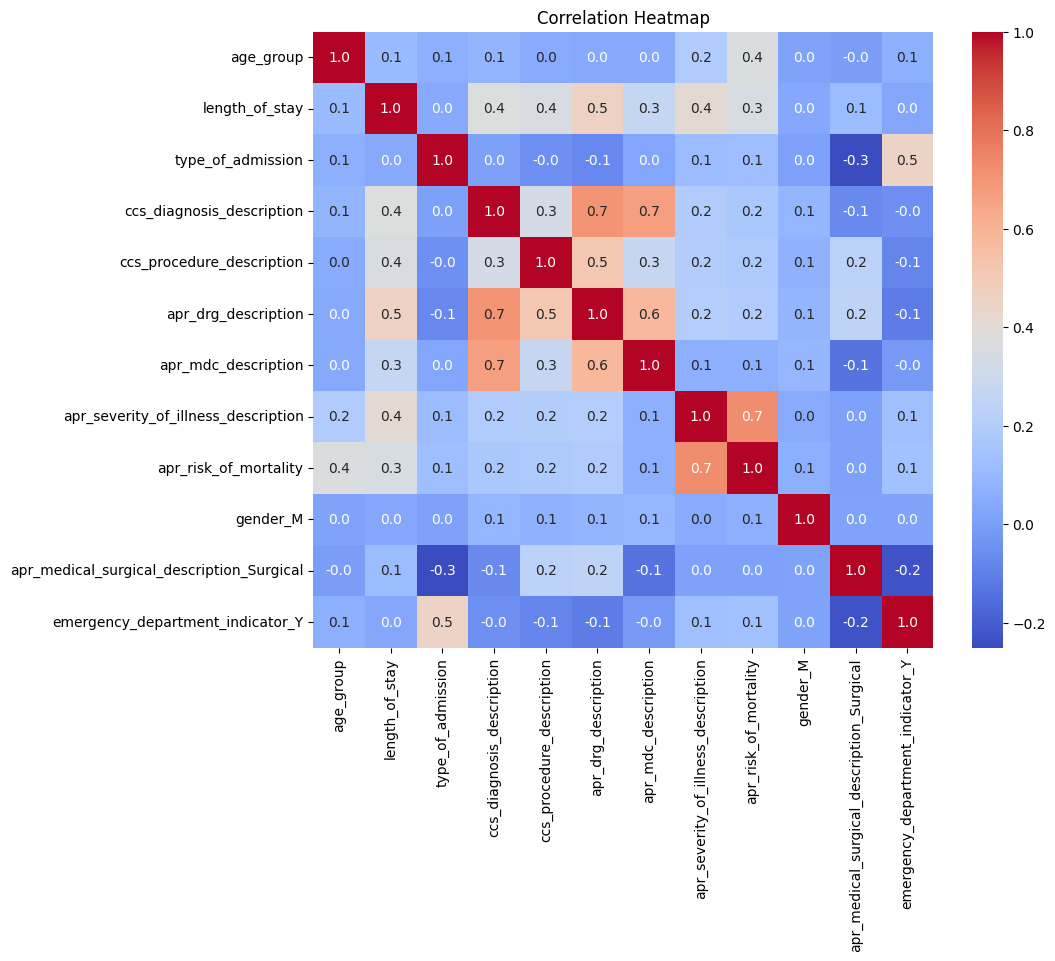

In [42]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

#### After checking the corrleation heat map there are no highly correlated features above 0.8 correlation so, we are going to keep all the features

In [43]:
#checking for duplication. 
df.duplicated().sum()

26320

In [44]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698111 entries, 0 to 698110
Data columns (total 12 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age_group                                  698111 non-null  int64  
 1   length_of_stay                             698111 non-null  int64  
 2   type_of_admission                          698111 non-null  float64
 3   ccs_diagnosis_description                  698111 non-null  float64
 4   ccs_procedure_description                  698111 non-null  float64
 5   apr_drg_description                        698111 non-null  float64
 6   apr_mdc_description                        698111 non-null  float64
 7   apr_severity_of_illness_description        698111 non-null  int64  
 8   apr_risk_of_mortality                      698111 non-null  int64  
 9   gender_M                                   698111 non-null  uint8  
 10  apr_medi

In [46]:
# saving data frame in csv file in processed folder for the modeling step.
df.to_csv('../data/processed/processed_data.csv',index=False)

## **Preprocessing Outcomes Summary:**

The main objective of preprocessing and outcomes as follows:

### 1. Checking the dataset for irrelevant columns that do not serve our prediction model of length of stay and dealing with them.
    - Not all the features serve our aim, as we attempt to create a general model that can predict patient length of stay regardless of the city or state. Additionally, 'total_cost' and 'charges' exceeding 120 days of stay do not make sense to keep. The following columns were removed: ['health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity', 'zip_code__3_digits','patient_disposition','ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code', 'apr_severity_of_illness_code','payment_typology_1','birth_weight','total_charges','total_costs','over_120_stay'].
    
    - after droping the above irrelevant features 1264916 duplicates appears in the data we drop them.
---  
### 2. Selecting & dropping not Adult patients as their treatment may vary alot from adult. 
     - we drop 342237 instants of 0 to 17 patients and we drop all of them to maintain the data for adult patients.
---
### 3. handling outliers.
* There was outliers above 20 days we deal with them by change there values to the end of the wisker which is almost 20 days by this way we are going to keep those patient data and point that prediction of 20 days it means 20 days and above.
---
### 4. Handling Categorical Variables:
    1) For ordinal categorical features:
            - By creating dictionary with ordinal number and maping the dictionary with the ordinal categorical feature.
            
     2) Encoding nominal feature:
     
            * For Features with high cardinality we use Target Encoding (Mean Encoding) for nominal categorical features then dropping it features like:
                  - (ccs_diagnosis_description: 257 unique values, ccs_procedure_description: 232, apr_drg_description: 285, apr_mdc_description: 24,  type_of_admission: 6 unique values)  
  

            * For features with low cardinality we use pandas get dumies to encode it features like:

                   - (gender: 2 unique, apr_medical_surgical_description: 2, emergency_department_indicator: 2) 
---
### 5. Correlation heatmap: Checking correlation matrices for the target length of stay after encoding the features. The results were as follows:

               - length_of_stay                               1.00
               - apr_drg_description                          0.46
               - apr_severity_of_illness_description          0.41
               - ccs_diagnosis_description                    0.37
               - ccs_procedure_description                    0.35
               - apr_risk_of_mortality                        0.35
               - apr_mdc_description                          0.27
               - apr_medical_surgical_description_Surgical    0.11
               - age_group                                    0.11
               - type_of_admission                            0.04
               - gender_M                                     0.04
               - emergency_department_indicator_Y             0.03

   #### After checking the corrleation heat map there are no highly correlated features above 0.8 correlation so, we are going to keep all the features.
   
        * Saving a dictionary for categorical features that will be needed in the model deployment step.
---
### 6. After checking for duplication after all of the above process we found:
     1) After step 1 droping the irrelevant features, (1,264,916) duplicates appears in the data we drop them.
     2) After step 2 we drop (342,237) instants of 0 to 17 patients to maintain the data sets for adult patients.
     3) checking duplicates after handling outliers & encoding (26,320) duplicated value. we drop all of it and rest the index.
---
### 7. Saving the preprocessed, encoded, and scaled CSV file for the next modeling step.
